In [74]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superstore-dataset-final/Sample - Superstore.csv


In [5]:
df=pd.read_csv("/kaggle/input/superstore-dataset-final/Sample - Superstore.csv",encoding="latin1")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [10]:
df.columns=df.columns.str.strip().str.lower().str.replace(" ","_")
print(df.columns)

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')


In [18]:
df["order_date"]=pd.to_datetime(df["order_date"])
df["ship_date"]=pd.to_datetime(df["ship_date"])


In [19]:
print(type(df["order_date"]))

<class 'pandas.core.series.Series'>


In [25]:
df["delivery_time_days"]=(df["ship_date"]-df["order_date"]).dt.days
print(df["delivery_time_days"].max())

7


In [53]:
df["profit_margin"]=(df["profit"]/df["sales"])
print("negative profit margin",(df["profit_margin"]<0).sum())
print("max profit margin",df["profit_margin"].max())
max_margin_order = df[df["profit_margin"] == df["profit_margin"].max()][
    ["order_id", "customer_name", "product_name", "sales", "profit", "profit_margin","delivery_time_days"]
]
print(max_margin_order)
# print("negative profit margin",(df["profit_margin"]<0).sum())

negative profit margin 1871
max profit margin 0.5
            order_id     customer_name  \
61    CA-2016-111682   Ted Butterfield   
246   CA-2014-131926     Dianna Wilson   
318   CA-2014-164973      Nathan Mautz   
322   CA-2014-156601    Frank Atkinson   
381   CA-2016-134775  Alejandro Savely   
...              ...               ...   
9768  CA-2017-142328     Tracy Collins   
9837  US-2016-125402        Dan Lawera   
9883  CA-2014-112291   Katrina Edelman   
9924  CA-2015-159534     Dave Hallsten   
9951  CA-2017-121559   Helen Wasserman   

                                           product_name    sales    profit  \
61                          Prang Dustless Chalk Sticks     1.68     0.840   
246   Adams Telephone Message Book w/Frequently-Call...    47.88    23.940   
318   Canon imageCLASS MF7460 Monochrome Digital Las...  3991.98  1995.990   
322                                    OIC Binder Clips     7.16     3.580   
381                    Southworth Structures Collection

In [39]:
df.to_csv("cleaned_superstore.csv", index=False)



In [46]:
df.describe()
print("info :")
df.info()
df['category'].value_counts()

info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   row_id              9994 non-null   int64         
 1   order_id            9994 non-null   object        
 2   order_date          9994 non-null   datetime64[ns]
 3   ship_date           9994 non-null   datetime64[ns]
 4   ship_mode           9994 non-null   object        
 5   customer_id         9994 non-null   object        
 6   customer_name       9994 non-null   object        
 7   segment             9994 non-null   object        
 8   country             9994 non-null   object        
 9   city                9994 non-null   object        
 10  state               9994 non-null   object        
 11  postal_code         9994 non-null   int64         
 12  region              9994 non-null   object        
 13  product_id          9994 non-null   objec

category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [48]:
print("sales vs profit: ")
df.groupby("category")[["sales", "profit"]].sum().sort_values("sales", ascending=False)


sales vs profit: 


,sales,profit
category,,
Technology,836154.0330,145454.9481
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008


In [51]:
print("negative profit order :",len(df[df["profit"]<0]))

negative profit order : 1871


In [67]:
print("category vise profit margin: ",df.groupby("category")["profit_margin"].mean())

print("region vise profit margin: "
      ,df.groupby("region")["profit_margin"].mean())




category vise profit margin:  category
Furniture          0.038784
Office Supplies    0.138030
Technology         0.156138
Name: profit_margin, dtype: float64
region vise profit margin:  region
Central   -0.104073
East       0.167227
South      0.163519
West       0.219487
Name: profit_margin, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='profit_margin', ylabel='Count'>

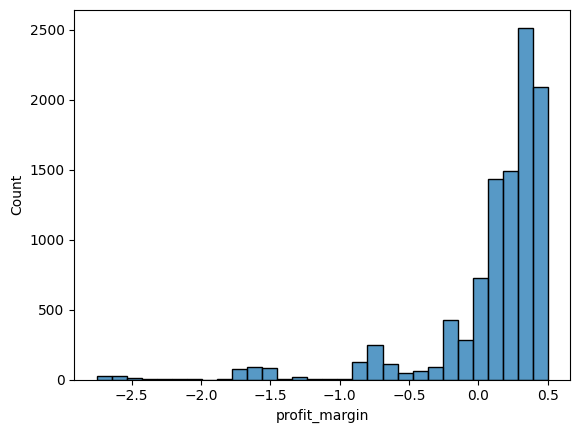

In [58]:

sns.histplot(df["profit_margin"], bins=30)


In [68]:
df.groupby("segment")[["sales","profit"]].sum()

,sales,profit
segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.296531e+05,60298.6785


<Axes: title={'center': 'monthly sales trend'}, xlabel='month'>

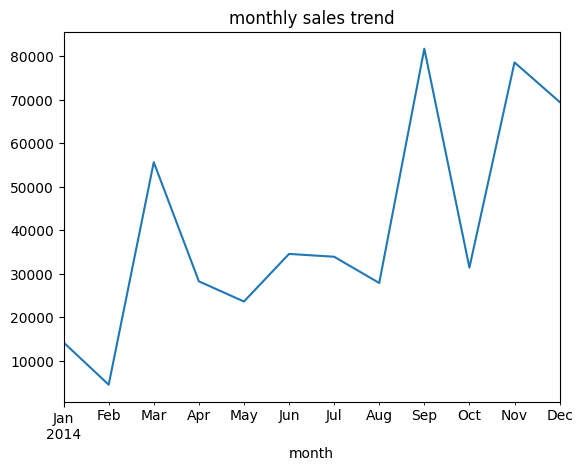

In [72]:
year=df[df["order_date"].dt.year==2014]
df["month"]=df["order_date"].dt.to_period("M")
monthly_sale=year.groupby("month")["sales"].sum()
monthly_sale.plot(title="monthly sales trend")

Text(0, 0.5, 'profit')

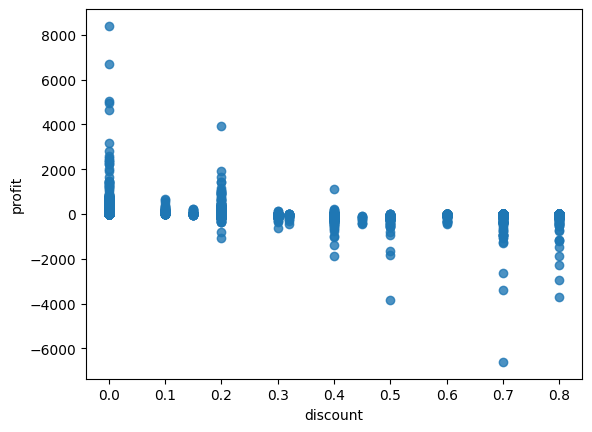

In [80]:
plt.scatter(df["discount"],df["profit"], alpha=0.8)
plt.xlabel("discount")
plt.ylabel("profit")

In [81]:
df.to_csv("cleaned_superstore.csv", index=False)